## Regression models 
by [Zahra Taheri](https://github.com/zahta) (15 May 2020)

In [1]:
#Import libraries
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#To make this notebook's output stable across runs
np.random.seed(42)

### A non-linear dataset based on a simple quadratic equation

In [2]:
# Generate a non-linear dataset based on a simple quadratic equation
X=9*np.random.rand(300,1)-4
y=13+X-0.7*X**2+3*np.random.rand(300,1)

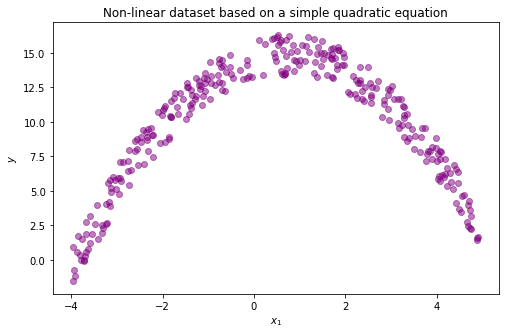

In [3]:
#Plot the dataset
figure,axes=plt.subplots(figsize=(8,5))

axes.set_title('Non-linear dataset based on a simple quadratic equation')
axes.set_xlabel('$x_1$')
axes.set_ylabel('$y$')

axes.scatter(X,y,color="purple", alpha=0.5)

### Polynomial Regression

In [4]:
#Transform the training data
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)

X_poly=poly_features.fit_transform(X)
print(X[10],X_poly[10])

[-3.81473955] [-3.81473955 14.55223784]


In [5]:
# Fit a Linear Regression model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

lin_reg.fit(X_poly,y)
inter=lin_reg.intercept_
coef=lin_reg.coef_
inter,coef

(array([14.65251316]), array([[ 0.97934491, -0.7153526 ]]))

In [6]:
# Test the model
X_new=np.linspace(-4,5,300).reshape(300,1)
X_new_poly=poly_features.fit_transform(X_new)
y_new=lin_reg.predict(X_new_poly)

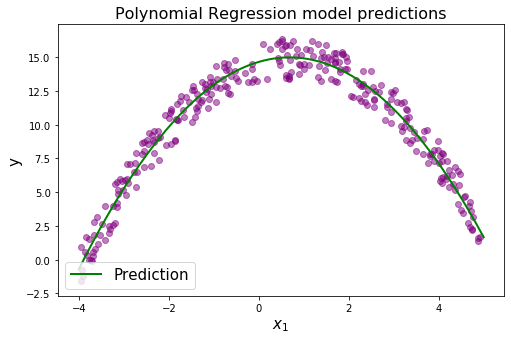

In [7]:
#Plot the results
fig,axes=plt.subplots(figsize=(8,5))
axes.set_title('Polynomial Regression model predictions',fontsize=16)
axes.set_xlabel('$x_1$',fontsize=15)
axes.set_ylabel('y',fontsize=15)

axes.plot(X_new,y_new,'green',lw=2,ls='-',label='Prediction')
axes.scatter(X,y,color="purple", alpha=0.5)
axes.legend(loc=3,fontsize=15)

### High-degree Polynomial Regression

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

std_scaler=StandardScaler()
lin_reg=LinearRegression()

poly_features1=PolynomialFeatures(degree=1,include_bias=False)
poly_features2=PolynomialFeatures(degree=2,include_bias=False)
poly_features200=PolynomialFeatures(degree=200,include_bias=False)

poly_regression1=Pipeline([("poly_features1",poly_features1),("std_scaler",std_scaler),("lin_reg",lin_reg)])
poly_regression2=Pipeline([("poly_features2",poly_features2),("std_scaler",std_scaler),("lin_reg",lin_reg)])
poly_regression200=Pipeline([("poly_features200",poly_features200),("std_scaler",std_scaler),("lin_reg",lin_reg)])

poly_regression200.fit(X,y)
y_new200=poly_regression200.predict(X_new)

poly_regression1.fit(X,y)
y_new1=poly_regression1.predict(X_new)

poly_regression2.fit(X,y)
y_new2=poly_regression2.predict(X_new)


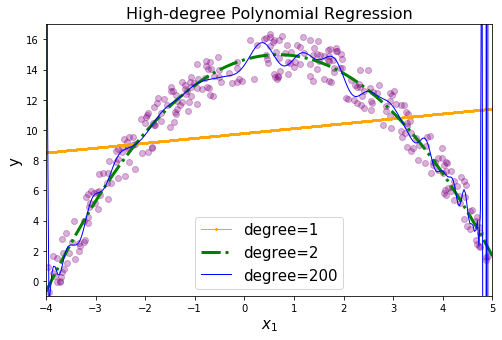

In [9]:
#Fit a 200-degree polynomial model to the training data and compare the result 
#with a pure linear model and a quadratic model 

fig,axes=plt.subplots(figsize=(8,5))            
axes.set_title('High-degree Polynomial Regression',fontsize=16)
axes.set_xlabel('$x_1$',fontsize=15)
axes.set_ylabel('y',fontsize=15)
plt.axis([-4, 5, -1, 17])

axes.scatter(X,y,color='purple',alpha=0.3)
axes.plot(X_new,y_new1, color="orange",lw=1, ls='-',marker='o',markersize=2,label='degree=1')
axes.plot(X_new,y_new2,color="green",lw=3,ls='-.',label='degree=2')
axes.plot(X_new,y_new200,color="blue",lw=1,ls='-',label='degree=200')
                     
axes.legend(loc=0,fontsize=15)

### Learning Curves

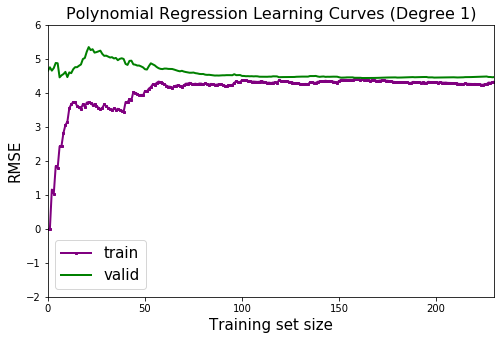

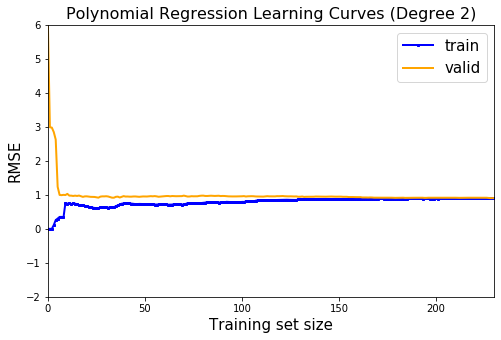

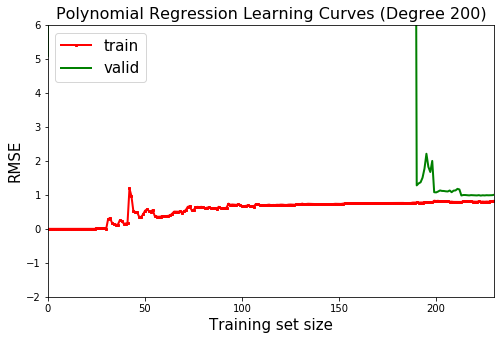

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def learning_curves(model,X,y,m,color1,color2):
    X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)
    train_errors=[]
    valid_errors=[]
    for i in range(1, len(X_train)):
        model.fit(X_train[:i],y_train[:i])
        y_train_predict=model.predict(X_train[:i])
        train_errors.append(mean_squared_error(y_train[:i],y_train_predict))
        y_valid_predict=model.predict(X_valid)
        valid_errors.append(mean_squared_error(y_valid,y_valid_predict))
    fig,axes=plt.subplots(figsize=(8,5))
    plt.axis([0, 230, -2, 6])
    axes.set_title('Polynomial Regression Learning Curves (Degree '+str(m)+')',fontsize=16)
    axes.set_xlabel('Training set size',fontsize=15)
    axes.set_ylabel('RMSE',fontsize=15)
    axes.plot(np.sqrt(train_errors),color=color1,lw=2,ls='-',marker='s', markersize=2,label="train")
    axes.plot(np.sqrt(valid_errors),color=color2,lw=2,ls='-',label="valid")
    axes.legend(loc=0,fontsize=15)
    
lin_reg = LinearRegression()
learning_curves(lin_reg, X, y,1,"purple","green")

learning_curves(poly_regression2, X, y,2,"blue","orange")

learning_curves(poly_regression200, X, y,200,"red","green")